In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

df = sns.load_dataset("titanic")
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.groupby(by='embark_town').mean()['fare']

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64

In [29]:
df.groupby(by='deck').agg(['count','mean','sum'])['fare']

,count,mean,sum
deck,,,
A,15,39.623887,594.3583
B,47,113.505764,5334.7709
C,59,100.151341,5908.9291
D,33,57.244576,1889.0710
E,32,46.026694,1472.8542
F,13,18.696792,243.0583
G,4,13.581250,54.3250


In [35]:
df.groupby(by=['class','who']).agg({'age':['mean'],'fare':['mean'],'deck':['count']})

age        fare  deck
                   mean        mean count
class  who                               
First  child   7.820000  139.382633     6
       man    42.382653   65.951086    91
       woman  35.500000  104.317995    78
Second child   4.543684   28.323905     4
       man    33.588889   19.054124     3
       woman  32.179688   20.868624     9
Third  child   6.817586   23.220190     3
       man    28.995556   11.340213     5
       woman  27.854167   15.354351     4

In [36]:
df.groupby(by=['class','who']).describe()['fare']

count        mean        std      min         25%       50%  \
class  who                                                                  
First  child    6.0  139.382633  43.666954  81.8583  120.000000  135.7750   
       man    119.0   65.951086  77.969681   0.0000   27.720800   39.6000   
       woman   91.0  104.317995  74.478185  25.9292   56.964600   80.0000   
Second child   19.0   28.323905   7.750054  14.5000   24.500000   26.2500   
       man     99.0   19.054124  15.195182   0.0000   11.500000   13.0000   
       woman   66.0   20.868624  10.997907  10.5000   13.000000   19.1250   
Third  child   58.0   23.220190  11.365095   7.2250   13.676075   21.0750   
       man    319.0   11.340213  10.661605   0.0000    7.750000    7.8958   
       woman  114.0   15.354351  12.308990   6.7500    7.775000    9.8250   

                    75%       max  
class  who                         
First  child  151.55000  211.3375  
       man     77.00835  512.3292  
       woman  134.07500  512.3292  
Second child   34.87500   41.5792  
       man     26.00000   73.5000  
       woman   26.00000   65.0000  
Third  child   31.27500   46.9000  
       man      8.66250   69.5500  
       woman   17.70000   69.5500

In [39]:
import numpy as np
pd.pivot_table(df,values='age',index='alive',aggfunc=np.mean)

,age
alive,
no,30.626179
yes,28.343690


In [40]:
pd.pivot_table(df,values='fare',index=['alive','class'],aggfunc=np.mean)

fare
alive class            
no    First   64.684007
      Second  19.412328
      Third   13.669364
yes   First   95.608029
      Second  22.055700
      Third   13.694887

In [50]:
df.head()

#calculate mean of 'points' column for rows where team equals 'A'
df.loc[(df['pclass'] == 1) & (df['fare']>100), 'age'].mean()

31.956666666666667

In [54]:
df.groupby(by='deck').mean()['fare'].sort_values(ascending=False)

deck
B    113.505764
C    100.151341
D     57.244576
E     46.026694
A     39.623887
F     18.696792
G     13.581250
Name: fare, dtype: float64

In [56]:
df.loc[(df['embarked'] == 'C') & (df['age']>60)][['pclass','fare','age','embarked','alone']]

,pclass,fare,age,embarked,alone
54,1,61.9792,65.0,C,False
96,1,34.6542,71.0,C,True
493,1,49.5042,71.0,C,True


<AxesSubplot:xlabel='class', ylabel='count'>

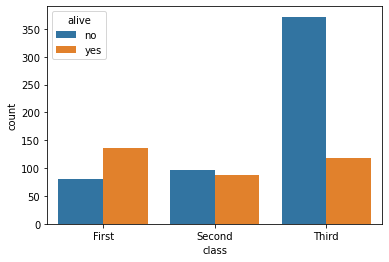

In [57]:
import seaborn as sns

sns.countplot(data=df,x='class',hue='alive')

<AxesSubplot:xlabel='class', ylabel='fare'>

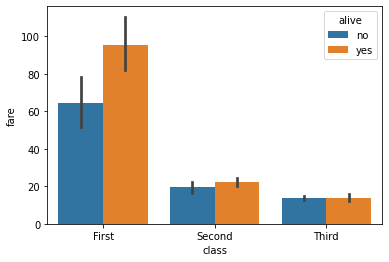

In [58]:
sns.barplot(data=df,x='class',y='fare',hue='alive')

<AxesSubplot:xlabel='deck', ylabel='fare'>

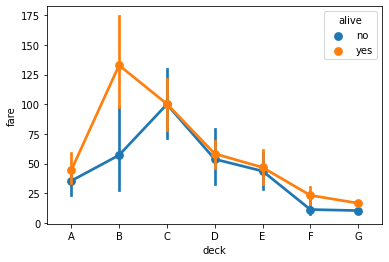

In [59]:
sns.pointplot(data=df,x='deck',y='fare',hue='alive')

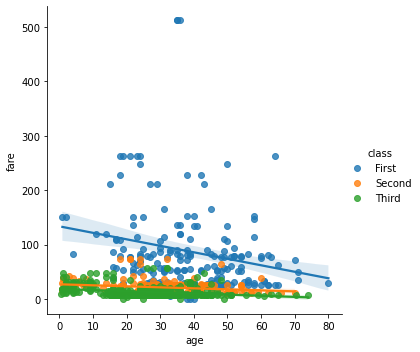

In [60]:
sns.lmplot(data=df,x='age',y='fare',hue='class')

In [64]:
df_corr = df.corr()[['age','fare']].loc[['age','fare']]
df_corr

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


In [4]:
sns.heatmap(data=df_corr,annot=True)

NameError: name 'sns' is not defined